## Group 15 Capstone Project

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Importing data showing the quantity of all different crops produced in Nigeria yearly from the year 1961 to 2019.

In [2]:
#import and clean crop production data csv file
food_data_original = pd.read_csv("datanow.csv")
food_data = food_data_original.drop(columns="Area")
food_data.columns = ["Crop","Year","Production in tonnes"]
food_data.head()

,Crop,Year,Production in tonnes
0,Bastfibres,1981,530
1,Bastfibres,1982,500
2,Bastfibres,1983,500
3,Bastfibres,1984,550
4,Bastfibres,1985,600


In [3]:
# check for missing data
food_data.isna().any()

Crop                    False
Year                    False
Production in tonnes    False
dtype: bool

In [4]:
# food_data.Crop.drop_duplicates().tolist()

In [5]:
# Aggregating data of Yearly food production
yearly_data = food_data.groupby("Year")[["Production in tonnes"]].sum()

# Converting Tonnes to MegaTonnes for easy readability and computation
yearly_data["MegaTonnes"] = round(yearly_data["Production in tonnes"] / 1000000, ndigits=2)

yearly_data.head()

,Production in tonnes,MegaTonnes
Year,,
1961,75229287,75.23
1962,77560773,77.56
1963,81067203,81.07
1964,82532638,82.53
1965,87029523,87.03


#### Plot graph showing increase of Production on a yearly basis


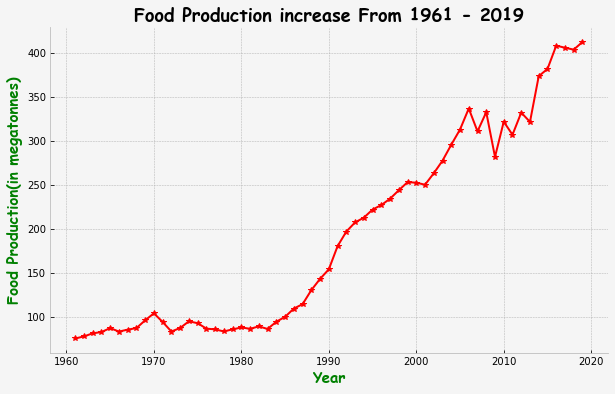

In [14]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top"]].set_visible(False)
plt.style.library['bmh']['axes.grid'] = True
plt.style.use('bmh')

# set font
lfont = {'family':'cursive','color':'green','size':15,'linespacing':8,'fontweight':'bold'}
lfontred = {'family':'cursive','color':'red','size':15,'linespacing':8,'fontweight':'bold'}
hfont = {'family':'cursive','size':18,'fontweight':'heavy'}

plt.plot(yearly_data["MegaTonnes"], color="red",marker='*')
plt.xlabel('Year',fontdict=lfont)
plt.ylabel('Food Production(in megatonnes)',fontdict=lfont)
plt.title('Food Production increase From 1961 - 2019',fontdict=hfont)


plt.show()

#### Importing data showing the year to year population of Nigeria.

In [7]:
#import population data csv file
population_original = pd.read_csv("Nig_Population.csv")
population = population_original.drop(columns=["Location","Variant"])

population.sort_values("PopTotal",ascending=False).head()

,Year,PopTotal,PopDensity
38,2019,200963.603,220.652
37,2018,195874.685,215.065
36,2017,190873.247,209.573
35,2016,185960.244,204.179
34,2015,181137.454,198.884


In [8]:
population["PopTotal"] = round(population["PopTotal"] / 1000000 * 1000, ndigits=2)

In [9]:
population.sort_values("PopTotal", ascending=False).head()

,Year,PopTotal,PopDensity
38,2019,200.96,220.652
37,2018,195.87,215.065
36,2017,190.87,209.573
35,2016,185.96,204.179
34,2015,181.14,198.884


#### Plot a barchart showing Nigeria's year to year population from the year 1981 to 2019.

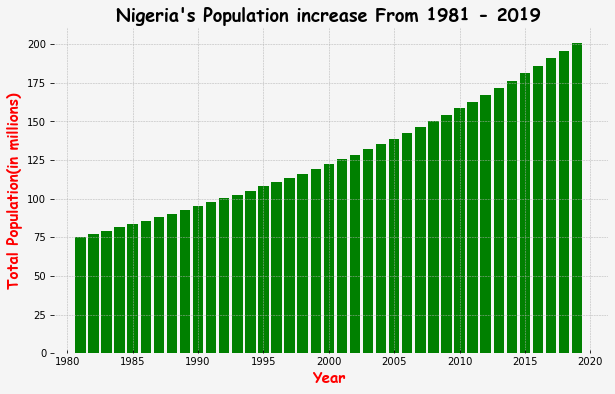

In [10]:
fig, ax = plt.subplots(figsize=(10, 6),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top","bottom","left"]].set_visible(False)

pop = population["PopTotal"]
years = population["Year"]

plt.bar(years, pop, color="green")
plt.xlabel('Year',fontdict=lfontred)
plt.ylabel('Total Population(in millions)',fontdict=lfontred)
plt.title("Nigeria's Population increase From 1981 - 2019",fontdict=hfont)

plt.show()

In [11]:
dmerge = yearly_data.merge(population, on="Year")
dmerge.head()

,Year,Production in tonnes,MegaTonnes,PopTotal,PopDensity
0,1981,86233485,86.23,75.44,82.832
1,1982,88965503,88.97,77.43,85.013
2,1983,86029839,86.03,79.41,87.195
3,1984,94276908,94.28,81.45,89.428
4,1985,99779344,99.78,83.56,91.750


#### Chart showing the relationship/relativity of crops produced in Nigeria and Nigeria's population on a year to year basis.

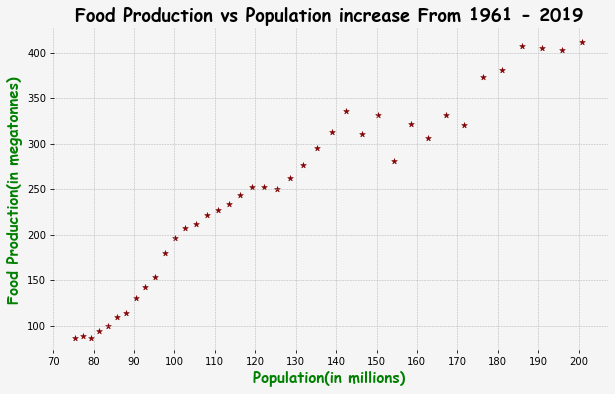

In [12]:
fig, ax = plt.subplots(figsize=(10, 6),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top","bottom","left"]].set_visible(False)

pop_tot = dmerge["PopTotal"]
food_tot = dmerge["MegaTonnes"]

plt.scatter(pop_tot, food_tot, color="maroon", marker="*")
plt.xlabel('Population(in millions)',fontdict=lfont)
plt.ylabel('Food Production(in megatonnes)',fontdict=lfont)
plt.title('Food Production vs Population increase From 1961 - 2019',fontdict=hfont)
plt.xticks(np.arange(70, 210, step=10))

plt.show()

#### Chart showing the ratio of increase in crop production in Nigeria to the corresponding increase in Nigeria's population on a year to year basis.

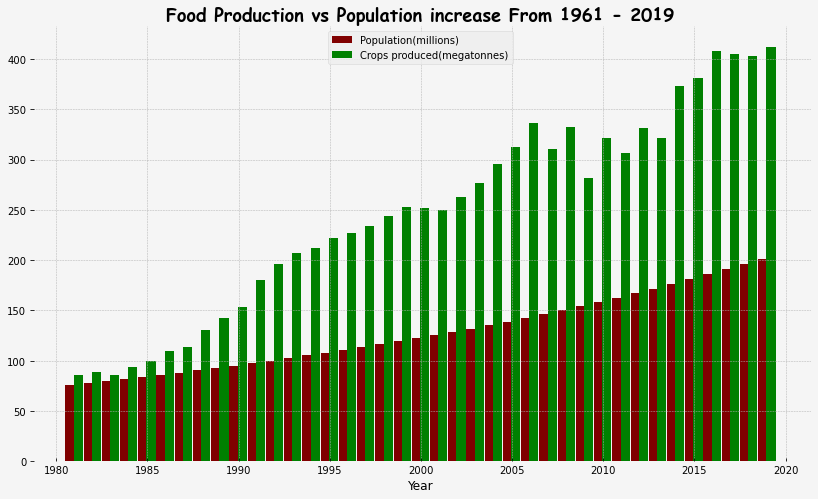

In [13]:
fig, ax = plt.subplots(figsize=(14, 8),facecolor="#F5F5F5")
ax.set_facecolor("#F5F5F5")
ax.spines[["right","top","bottom","left"]].set_visible(False)

pop_tot = dmerge["PopTotal"]
food_tot = dmerge["MegaTonnes"]
year_tot = dmerge["Year"]

plt.bar(year_tot -0.25, pop_tot, color="maroon", width=0.5, label="Population(millions)")
plt.bar(year_tot +0.2, food_tot, color="green", width=0.5, label="Crops produced(megatonnes)")
plt.xlabel('Year')
plt.title('Food Production vs Population increase From 1961 - 2019',fontdict=hfont)
plt.legend(loc="upper center")

plt.show()